   ##                    Preprocessing Of Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ubaid\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

In [5]:
data=pd.read_csv('data.csv')

In [114]:
data.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [115]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [116]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
data=data.drop(['date','street','statezip','country'],axis=1)

In [9]:
#data=data.drop(['waterfront'],axis=1)

In [7]:
data['city']=pd.factorize(data['city'])[0]

In [122]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
city             0
dtype: int64

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 503.2 KB


In [8]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city'],
      dtype='object')

In [125]:
data.shape

(4600, 14)

In [9]:
data['bedrooms']  = data['bedrooms'].astype('int64')
data['floors']    = data['floors'].astype('int64')

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   int64  
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   int64  
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 503.2 KB


## Exploratory Data Analysis

#### How Price is Distributed

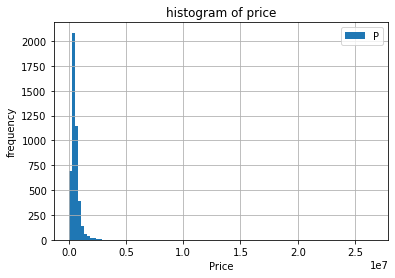

In [10]:
data['price'].hist(bins=100)
plt.xlabel("Price")
plt.ylabel("frequency")
plt.title("histogram of price")
plt.legend("Price")
plt.show()

### Removing rows based on outliers

In [11]:
(data['price'] > 0.3e7).sum()

9

In [12]:
data = data[~(data['price'] > 0.3e7)]

#### Distribution of price after removel of outliers

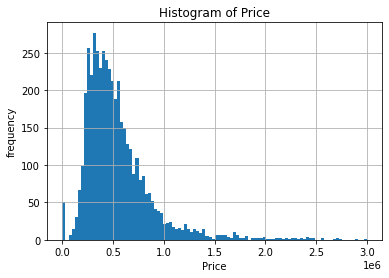

In [13]:
data['price'].hist(bins=100)
plt.xlabel('Price')
plt.ylabel('frequency')
plt.title('Histogram of Price')
plt.show()

In [14]:
bedrooms=data['bedrooms'].value_counts()
bedrooms

3    2030
4    1529
2     566
5     350
6      60
1      38
7      13
8       2
0       2
9       1
Name: bedrooms, dtype: int64

In [15]:
floors=data['floors'].value_counts()
floors

1    2614
2    1848
3     129
Name: floors, dtype: int64

In [16]:
(data['price']==0).sum()

49

In [17]:
data['price'].replace(0,np.nan,inplace=True)      #replacing 0's with nan

In [18]:
data.dropna(inplace=True)

In [25]:
#data['price'].fillna(value=data['price'].mean(),inplace=True)

In [20]:
#(data['waterfront']==0).sum()

In [138]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city'],
      dtype='object')

In [19]:
duplicates = data[data.duplicated()]
duplicates

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city


In [140]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
count,4.542000e+03,4542.000000,4542.000000,4542.000000,4.542000e+03,4542.000000,4542.000000,4542.000000,4542.000000,4542.000000,4542.000000,4542.000000,4542.000000,4542.000000
mean,5.437057e+05,3.392118,2.151255,2124.428886,1.482228e+04,1.458829,0.006165,0.231616,3.448921,1817.153457,307.275429,1970.790841,808.402466,8.492955
std,3.343186e+05,0.902008,0.769943,931.881656,3.599441e+04,0.552028,0.078282,0.760211,0.675107,843.027175,453.452628,29.759690,979.383266,9.115198
min,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.000000
25%,3.260000e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,1.000000
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.672500e+03,1.000000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,4.000000
75%,6.554438e+05,4.000000,2.500000,2610.000000,1.092675e+04,2.000000,0.000000,0.000000,4.000000,2297.500000,600.000000,1997.000000,1999.000000,14.000000
max,3.000000e+06,9.000000,8.000000,13540.000000,1.074218e+06,3.000000,1.000000,4.000000,5.000000,9410.000000,4130.000000,2014.000000,2014.000000,43.000000


In [20]:
data.drop_duplicates()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,3.130000e+05,3,1.50,1340,7912,1,0,0,3,1340,0,1955,2005,0
1,2.384000e+06,5,2.50,3650,9050,2,0,4,5,3370,280,1921,0,1
2,3.420000e+05,3,2.00,1930,11947,1,0,0,4,1930,0,1966,0,2
3,4.200000e+05,3,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,3
4,5.500000e+05,4,2.50,1940,10500,1,0,0,4,1140,800,1976,1992,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3,1.75,1510,6360,1,0,0,4,1510,0,1954,1979,1
4596,5.343333e+05,3,2.50,1460,7573,2,0,0,3,1460,0,1983,2009,3
4597,4.169042e+05,3,2.50,3010,7014,2,0,0,3,3010,0,2009,0,18
4598,2.034000e+05,4,2.00,2090,6630,1,0,0,3,1070,1020,1974,0,1


In [142]:
data['price'].min()

7800.0

In [143]:
data['price'].max()

3000000.0

In [144]:
data['price'].mean()

543705.690659794

<AxesSubplot:xlabel='floors', ylabel='price'>

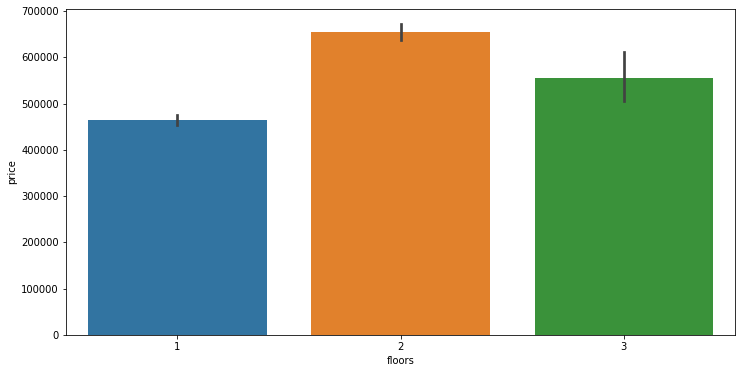

In [145]:
plt.figure(figsize=(12,6))
sns.barplot(x=data['floors'],y=data['price'])

In [146]:
corr=data.corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
price,1.000000,0.336106,0.526144,0.683735,0.085196,0.243837,0.176277,0.375749,0.054714,0.590851,0.306662,0.028699,-0.049283,-0.045454
bedrooms,0.336106,1.000000,0.544793,0.597365,0.070888,0.152945,-0.015529,0.107100,0.020783,0.482455,0.330687,0.143257,-0.062425,0.084370
bathrooms,0.526144,0.544793,1.000000,0.754789,0.109137,0.505442,0.041158,0.193432,-0.123564,0.684663,0.278276,0.469220,-0.222603,0.075529
sqft_living,0.683735,0.597365,0.754789,1.000000,0.216472,0.343512,0.068646,0.294722,-0.065742,0.874157,0.429909,0.292820,-0.127802,0.128321
sqft_lot,0.085196,0.070888,0.109137,0.216472,1.000000,-0.005216,0.016426,0.072312,0.000961,0.220485,0.034958,0.049108,-0.021360,0.195618
floors,0.243837,0.152945,0.505442,0.343512,-0.005216,1.000000,0.010971,0.019580,-0.307004,0.519222,-0.259355,0.562422,-0.248269,0.020468
waterfront,0.176277,-0.015529,0.041158,0.068646,0.016426,0.010971,1.000000,0.342346,0.010126,0.047046,0.053609,-0.031397,0.009530,0.078141
view,0.375749,0.107100,0.193432,0.294722,0.072312,0.019580,0.342346,1.000000,0.061245,0.162630,0.303327,-0.067378,0.025207,0.005098
condition,0.054714,0.020783,-0.123564,-0.065742,0.000961,-0.307004,0.010126,0.061245,1.000000,-0.180251,0.200005,-0.399214,-0.183811,-0.036649
sqft_above,0.590851,0.482455,0.684663,0.874157,0.220485,0.519222,0.047046,0.162630,-0.180251,1.000000,-0.062666,0.413040,-0.164754,0.189859


<AxesSubplot:>

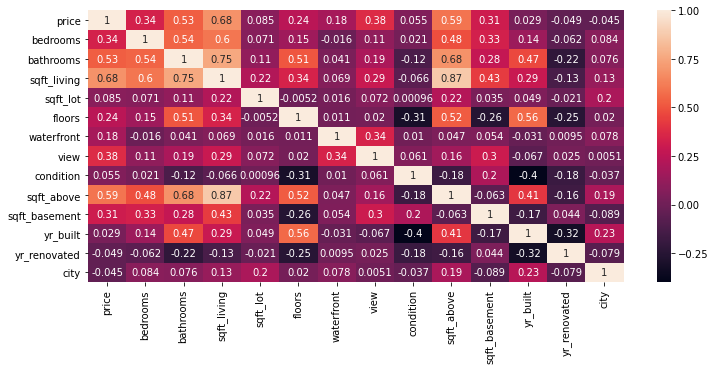

In [147]:
plt.figure(figsize=(12,5))
sns.heatmap(corr,annot=True)

(array([ 79., 111.,  79.,  95., 171.,  92.,  38., 191., 189., 262., 252.,
        274., 281., 152., 365., 224., 359., 223., 353., 484., 268.]),
 array([1900.        , 1905.42857143, 1910.85714286, 1916.28571429,
        1921.71428571, 1927.14285714, 1932.57142857, 1938.        ,
        1943.42857143, 1948.85714286, 1954.28571429, 1959.71428571,
        1965.14285714, 1970.57142857, 1976.        , 1981.42857143,
        1986.85714286, 1992.28571429, 1997.71428571, 2003.14285714,
        2008.57142857, 2014.        ]),
 <BarContainer object of 21 artists>)

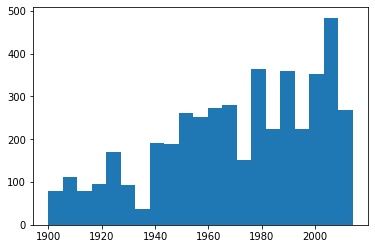

In [148]:
plt.hist(data['yr_built'],bins='auto',linewidth=0.5)

In [48]:

data.to_csv('outputfile.csv', index=False)

In [149]:
data.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3,1.50,1340,7912,1,0,0,3,1340,0,1955,2005,0
1,2384000.0,5,2.50,3650,9050,2,0,4,5,3370,280,1921,0,1
2,342000.0,3,2.00,1930,11947,1,0,0,4,1930,0,1966,0,2
3,420000.0,3,2.25,2000,8030,1,0,0,4,1000,1000,1963,0,3
4,550000.0,4,2.50,1940,10500,1,0,0,4,1140,800,1976,1992,4
5,490000.0,2,1.00,880,6380,1,0,0,3,880,0,1938,1994,1
6,335000.0,2,2.00,1350,2560,1,0,0,3,1350,0,1976,0,4
7,482000.0,4,2.50,2710,35868,2,0,0,3,2710,0,1989,0,5
8,452500.0,3,2.50,2430,88426,1,0,0,4,1570,860,1985,0,6
9,640000.0,4,2.00,1520,6200,1,0,0,3,1520,0,1945,2010,1


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'city'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

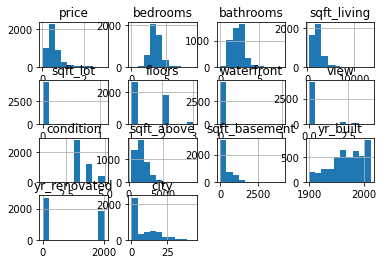

In [150]:
data.hist()

In [21]:
from sklearn.linear_model import Lasso

In [22]:
X=data.drop(['price'],axis=1)
y=data['price']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [44]:
lasso= Lasso(alpha=0.50)

In [45]:
lasso.fit(X_train, y_train,)

C:\Users\ubaid\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66872083619219.48, tolerance: 34895843378.38386
  positive)


Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [46]:
y_pred = lasso.predict(X_test)

In [47]:
lasso.score(X_train,y_train)

0.5871063165578265